In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

In [2]:
df=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)

In [3]:
df=df[df['day'].str.isdigit()==True]

## Data Cleaning

In [4]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
dtype: int64

In [5]:
df=df.dropna().reset_index(drop=True)

In [6]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [7]:
df[df.isnull().any(axis=1)]   #Row with any missing value

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [8]:
df.iloc[120:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
123,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
124,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire


In [8]:
df.loc[df.index < 122,'Region']=0
df.loc[df.index >= 122,'Region']=1

In [9]:
df['Region']=df['Region'].astype(int,copy=False)

In [10]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [11]:
df.columns=df.columns.str.strip()   # Remove spaces in the column

In [12]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

Change the required data type

In [13]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']]=df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)
df[['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']]=df[['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype(float)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.0+ KB


In [16]:
#df.drop(columns=['day','month','year'],axis=1,inplace=True)

In [17]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [15]:
# Encoding the column Classes
df['Classes']=df['Classes'].str.strip()

In [16]:
df.loc[df['Classes']=='not fire','Classes']=0
df.loc[df['Classes']=='fire','Classes']=1

In [17]:
df['Classes']=df['Classes'].astype(int)

In [18]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [19]:
percent_class=df['Classes'].value_counts(normalize=True)*100

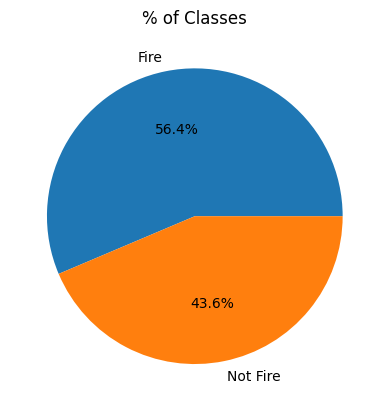

In [20]:
plt.pie(percent_class,labels=['Fire','Not Fire'],autopct='%1.1f%%')
plt.title('% of Classes')
plt.show()

In [21]:
df.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
day,1.000000,-0.000369,NaN,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781,0.202840,0.000821
month,-0.000369,1.000000,NaN,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639,0.024004,0.001857
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.097227,-0.056781,NaN,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.076034,-0.041252,NaN,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,0.047812,-0.039880,NaN,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.112523,0.034822,NaN,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.224956,0.017030,NaN,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.491514,0.067943,NaN,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.527952,0.126511,NaN,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734


<Axes: >

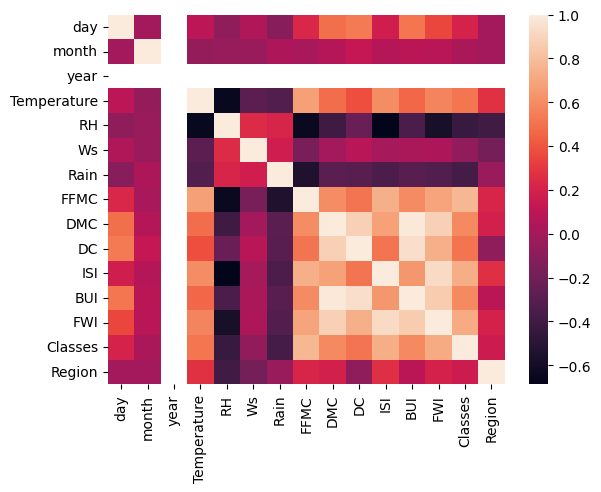

In [22]:
sns.heatmap(df.corr())

Text(0.5, 1.0, 'Fire Analysis of Brjaia Regions')

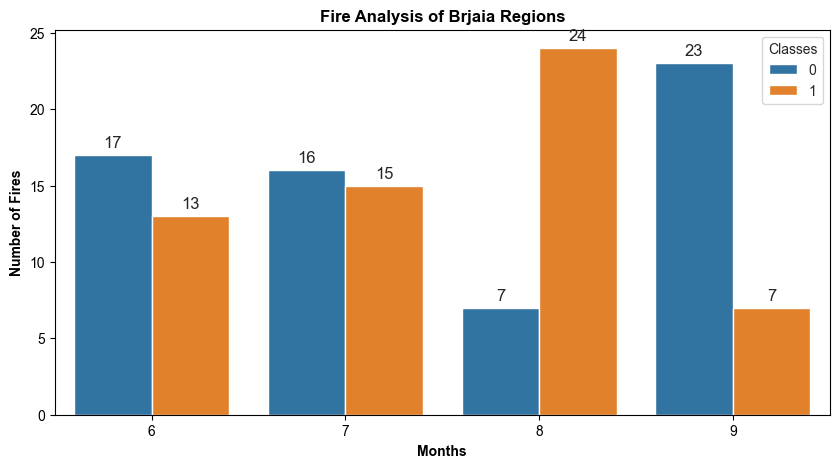

In [23]:
## Monthly Fire Analysis
dftemp=df.loc[df['Region']==0]
plt.subplots(figsize=(10,5))
sns.set_style('whitegrid')
ax=sns.countplot(x='month',hue='Classes',data=dftemp)
for bar in ax.patches:
    height = bar.get_height()
    if height>0:
        ax.text(
            x=bar.get_x() + bar.get_width() / 2,  # Center of the bar
            y=height + 0.5,                       # Slightly above the bar
            s=f'{int(height)}',                   # Text to display
            ha='center',                          # Horizontal alignment
            fontsize=12                           # Font size
        )
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Brjaia Regions",weight='bold')

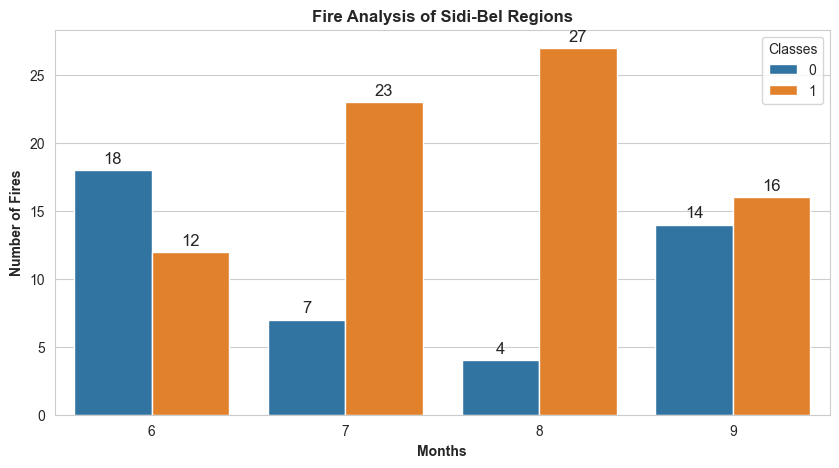

In [27]:
dftemp=df.loc[df['Region']==1]
plt.subplots(figsize=(10,5))
sns.set_style('whitegrid')
ax=sns.countplot(x='month',hue='Classes',data=dftemp)
for bar in ax.patches:
    height = bar.get_height()
    if height>0:
        ax.text(
            x=bar.get_x() + bar.get_width() / 2,  # Center of the bar
            y=height + 0.5,                       # Slightly above the bar
            s=f'{int(height)}',                   # Text to display
            ha='center',                          # Horizontal alignment
            fontsize=12                           # Font size
        )
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Sidi-Bel Regions",weight='bold')
plt.show()

### Note: 0 = Not Fire | 1 = Fire

# Trianing the model

In [28]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [24]:
df.drop(columns=['day','month','year'],axis=1,inplace=True)

In [25]:
# Independent and Dependent Features

X=df.drop(['FWI'],axis=1)
Y=df['FWI']

In [26]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=42)

In [27]:
Xtrain.shape,Xtest.shape

((194, 11), (49, 11))

## Feature Selection

<Axes: >

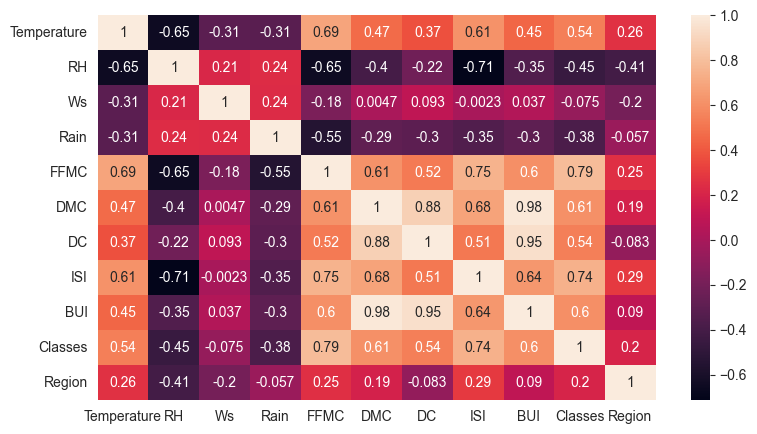

In [28]:
# Check for multicollinearity
plt.figure(figsize=(9,5))
sns.heatmap(Xtrain.corr(),annot=True)

In [35]:
# VIF dataframe
def vif_check(X_input):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns

    # calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                            for i in range(len(X.columns))]
    return vif_data

In [39]:
vif_data=vif_check(X)

In [37]:
# Feature Selection Based on Correlation Analysis

def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [38]:
correlation(Xtrain,0.8)

{'BUI', 'DC'}

In [33]:
Xtrain.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.653725,-0.308149,-0.313112,0.690285,0.468911,0.372163,0.613138,0.446280,0.539642,0.258344
RH,-0.653725,1.000000,0.211645,0.239441,-0.649239,-0.401836,-0.220945,-0.714640,-0.346511,-0.454926,-0.408441
Ws,-0.308149,0.211645,1.000000,0.235922,-0.176596,0.004712,0.092866,-0.002300,0.037465,-0.075322,-0.202357
Rain,-0.313112,0.239441,0.235922,1.000000,-0.547864,-0.288538,-0.301110,-0.349903,-0.299179,-0.378585,-0.057382
FFMC,0.690285,-0.649239,-0.176596,-0.547864,1.000000,0.611978,0.519513,0.751819,0.598248,0.786012,0.254770
DMC,0.468911,-0.401836,0.004712,-0.288538,0.611978,1.000000,0.876122,0.679049,0.983891,0.606775,0.188980
DC,0.372163,-0.220945,0.092866,-0.301110,0.519513,0.876122,1.000000,0.512934,0.946181,0.538893,-0.083038
ISI,0.613138,-0.714640,-0.002300,-0.349903,0.751819,0.679049,0.512934,1.000000,0.637669,0.740072,0.291889
BUI,0.446280,-0.346511,0.037465,-0.299179,0.598248,0.983891,0.946181,0.637669,1.000000,0.602102,0.090326
Classes,0.539642,-0.454926,-0.075322,-0.378585,0.786012,0.606775,0.538893,0.740072,0.602102,1.000000,0.196276


In [40]:
dropped_features=list(vif_data.loc[vif_data['VIF']>150,'feature'])

After careful speculation(using VIF and correlation matrix), we dropped the feature 'DMC' and 'BUI'

In [41]:
Xtrain.drop(columns=dropped_features,axis=1,inplace=True)

In [42]:
Xtest.drop(columns=dropped_features,axis=1,inplace=True)

In [43]:
# Standardization
scale=StandardScaler()
X_train=scale.fit_transform(Xtrain)
X_test=scale.transform(Xtest)

Text(0.5, 1.0, 'After Standardization')

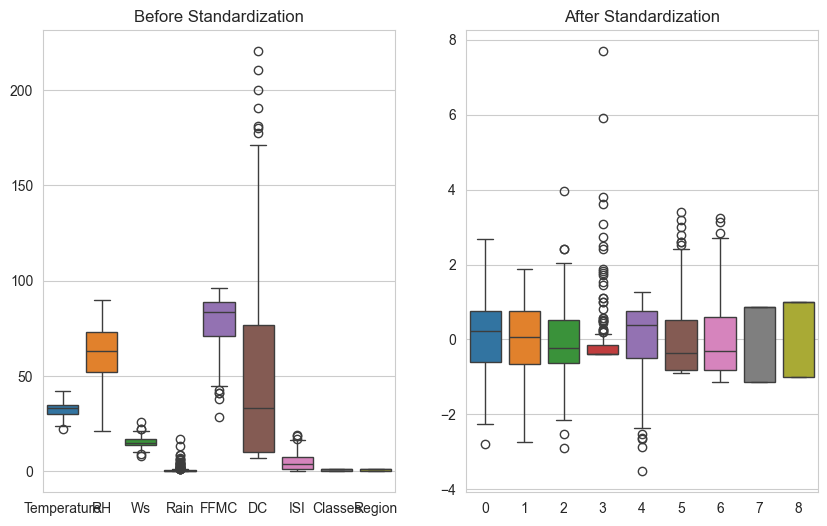

In [44]:
# Analysis of Standardization (visualizing the outliers)
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.boxplot(Xtrain)
plt.title('Before Standardization')
plt.subplot(1,2,2)
sns.boxplot(X_train)
plt.title('After Standardization')

# Linear Regression

MAE: 0.7697679273795196
R2 score: 0.9564612105162215


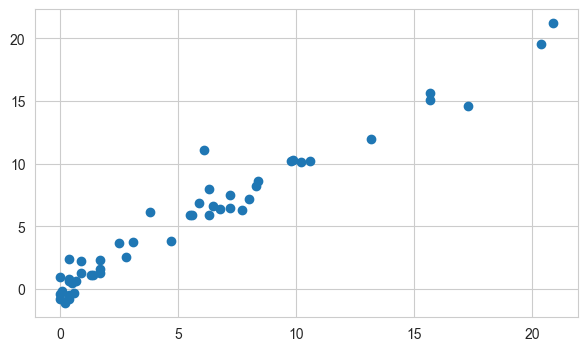

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error

linreg=LinearRegression(n_jobs=-1)
linreg.fit(X_train,Ytrain)
Ypred=linreg.predict(X_test)
mae=mean_absolute_error(Ytest,Ypred)
r2=r2_score(Ytest,Ypred)
print(f"MAE: {mae}")
print(f"R2 score: {r2}")
plt.figure(figsize=(7,4))
plt.scatter(Ytest,Ypred)

# Lasso Regression (L1 Regularization)

MAE: 1.0117803862384438
R2 score: 0.9429840249928635


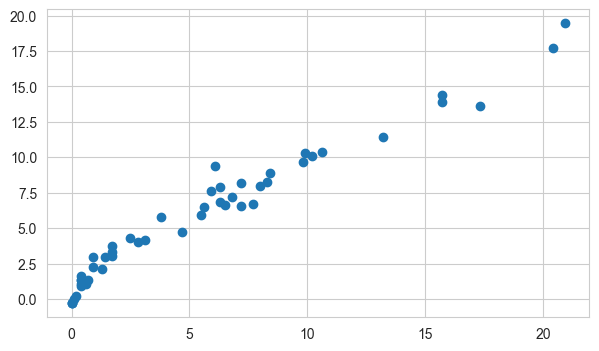

In [50]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score,mean_absolute_error

lasso=Lasso()
lasso.fit(X_train,Ytrain)
Ypred=lasso.predict(X_test)
mae=mean_absolute_error(Ytest,Ypred)
r2=r2_score(Ytest,Ypred)
print(f"MAE: {mae}")
print(f"R2 score: {r2}")

plt.figure(figsize=(7,4))
plt.scatter(Ytest,Ypred)

MAE: 0.7042144498358549
R2 score: 0.960342219148742


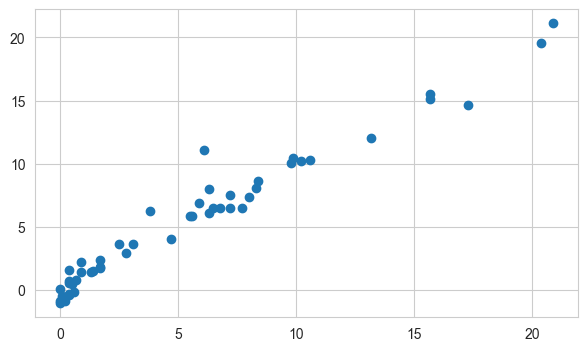

In [52]:
# Cross validation
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score,mean_absolute_error

lassocv=LassoCV(cv=5)
lassocv.fit(X_train,Ytrain)
Ypred=lassocv.predict(X_test)
mae=mean_absolute_error(Ytest,Ypred)
r2=r2_score(Ytest,Ypred)
print(f"MAE: {mae}")
print(f"R2 score: {r2}")

plt.figure(figsize=(7,4))
plt.scatter(Ytest,Ypred)

# Ridge Regression (L2 Regularization)

MAE: 0.768988383086267
R2 score: 0.9564096586025157


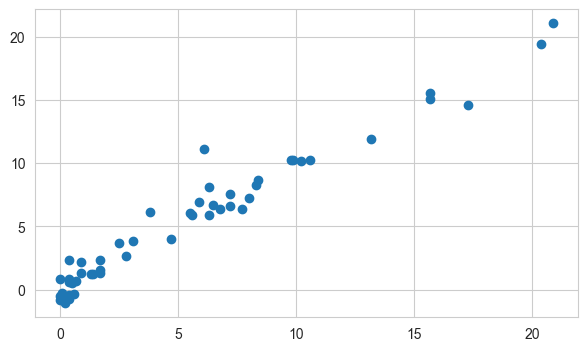

In [51]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score,mean_absolute_error

ridge=Ridge()
ridge.fit(X_train,Ytrain)
Ypred=ridge.predict(X_test)
mae=mean_absolute_error(Ytest,Ypred)
r2=r2_score(Ytest,Ypred)
print(f"MAE: {mae}")
print(f"R2 score: {r2}")

plt.figure(figsize=(7,4))
plt.scatter(Ytest,Ypred)

MAE: 0.768988383086267
R2 score: 0.9564096586025157


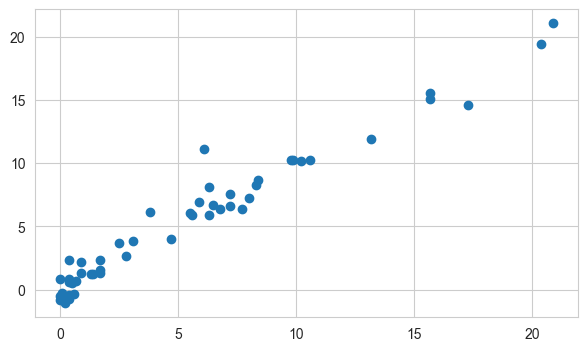

In [ ]:
#Cross Validation
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_absolute_error

ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train,Ytrain)
Ypred=ridgecv.predict(X_test)
mae=mean_absolute_error(Ytest,Ypred)
r2=r2_score(Ytest,Ypred)
print(f"MAE: {mae}")
print(f"R2 score: {r2}")

plt.figure(figsize=(7,4))
plt.scatter(Ytest,Ypred)

# ElasticNet Regression

MAE: 1.8384290134051158
R2 score: 0.8482540371037068


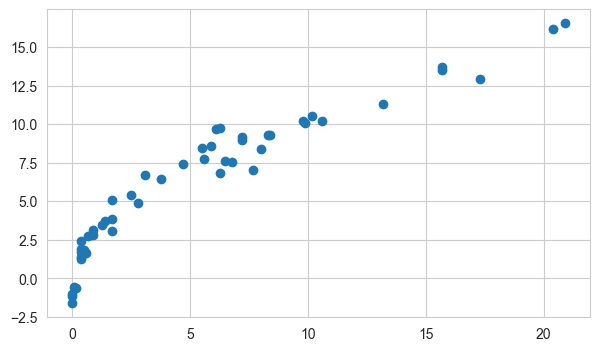

In [48]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error

elastic=ElasticNet()
elastic.fit(X_train,Ytrain)
Ypred=elastic.predict(X_test)
mae=mean_absolute_error(Ytest,Ypred)
r2=r2_score(Ytest,Ypred)
print(f"MAE: {mae}")
print(f"R2 score: {r2}")

plt.figure(figsize=(7,4))
plt.scatter(Ytest,Ypred)

MAE: 0.7485306076156015
R2 score: 0.9573089118076051


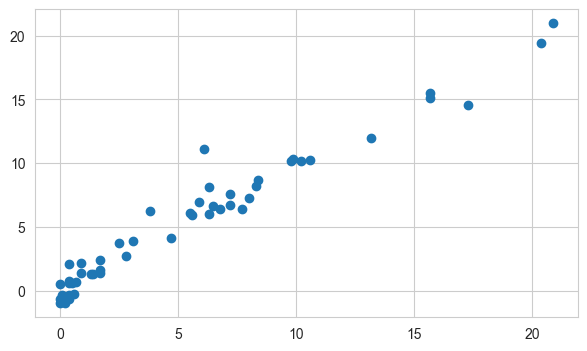

In [97]:
# Cross validation
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import r2_score,mean_absolute_error

elasticcv=ElasticNetCV(cv=5)
elasticcv.fit(X_train,Ytrain)
Ypred=elasticcv.predict(X_test)
mae=mean_absolute_error(Ytest,Ypred)
r2=r2_score(Ytest,Ypred)
print(f"MAE: {mae}")
print(f"R2 score: {r2}")

plt.figure(figsize=(7,4))
plt.scatter(Ytest,Ypred)

## Pickling the model

In [53]:
import pickle
pickle.dump(lassocv,open('lassocv.pkl','wb'))
pickle.dump(scale,open('scale.pkl','wb'))